In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from pathlib import Path
from matplotlib.ticker import MultipleLocator
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

In [98]:
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/1_bkg.txt")          # rows = Mass values

# ------------------------------------------------------------------
# 2 · loop through every Kr file, subtract & clip
# ------------------------------------------------------------------
file_paths = Path("Data").glob("Kr-*.txt")  # or use your explicit list

data_dict = {}

for path in file_paths:
    df = utils.load_scan(path)

    # align on Mass and subtract               (automatic index alignment)
    df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

    # store in the dict under a short key, e.g. "Kr-1"
    data_dict[path.stem] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Kr-1"].head())


   Mass  Pressure (uncorrected)  Pressure (torr)
0  30.0            5.110000e-08              0.0
1  30.1            4.960000e-08              0.0
2  30.2            4.250000e-08              0.0
3  30.3            1.100000e-08              0.0
4  30.4            1.820000e-09              0.0


In [107]:
pressures = [
    '25 mbar', '4.5 mbar', '1.24 mbar', '1.18 mbar', '1.05 mbar', 
    '4.45E-1 mbar', '1.97E-1 mbar', '1.53E-1 mbar', '7.90E-2 mbar', '3.85E-2 mbar'
]

In [99]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)

In [100]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

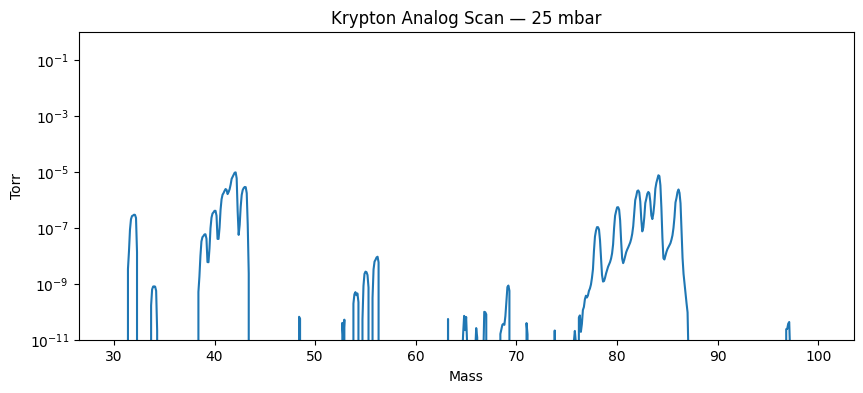

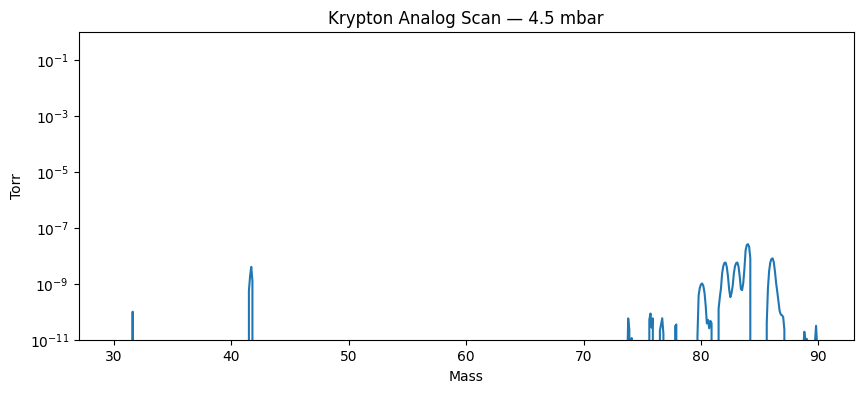

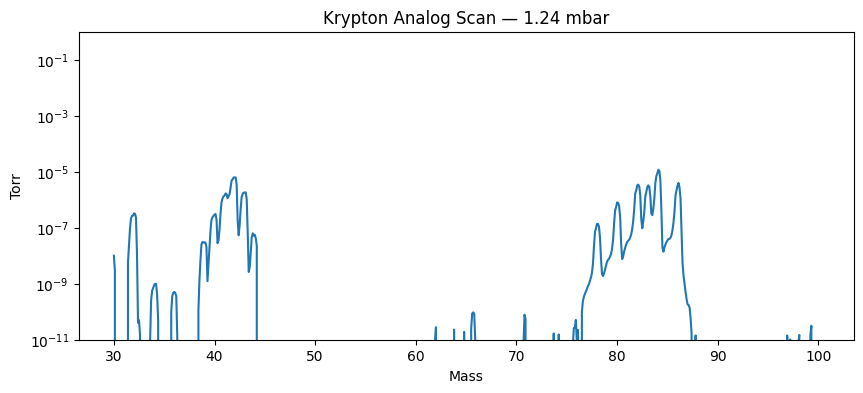

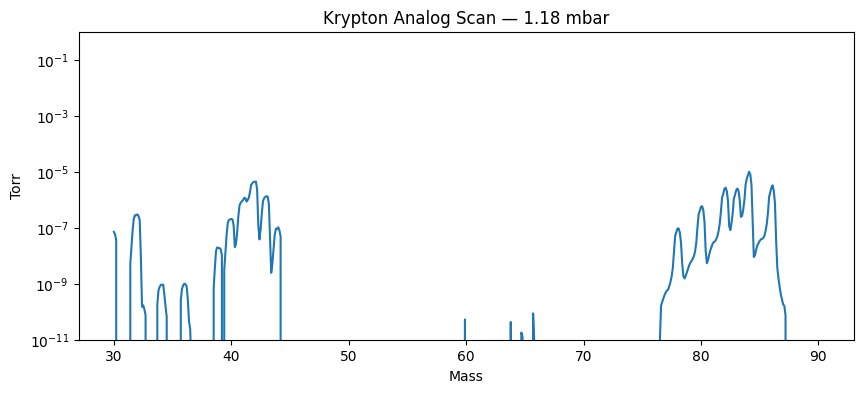

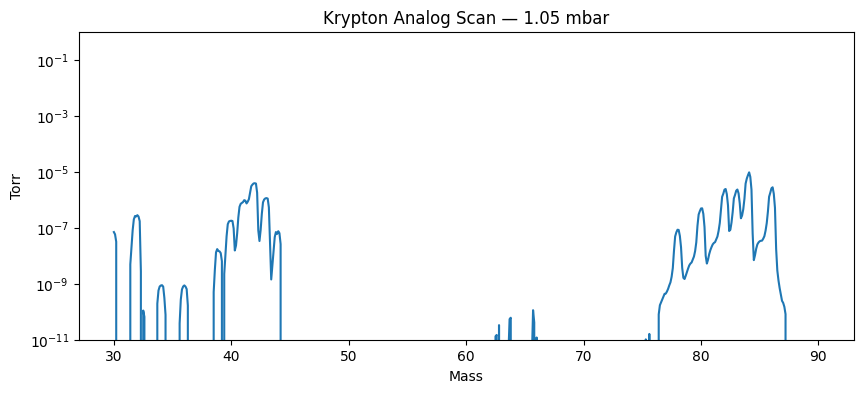

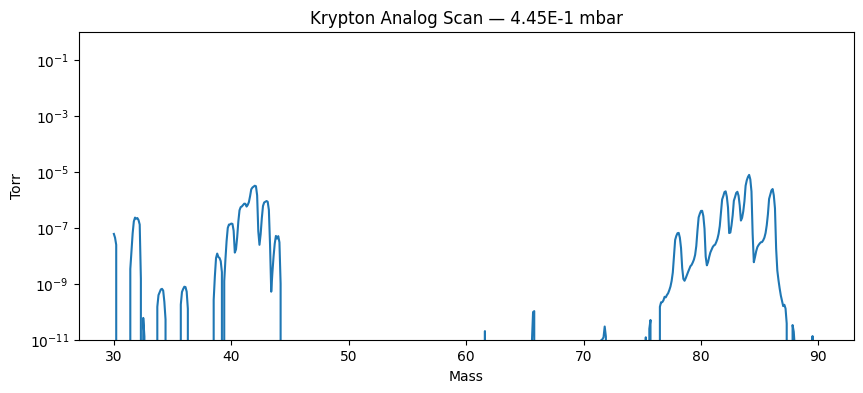

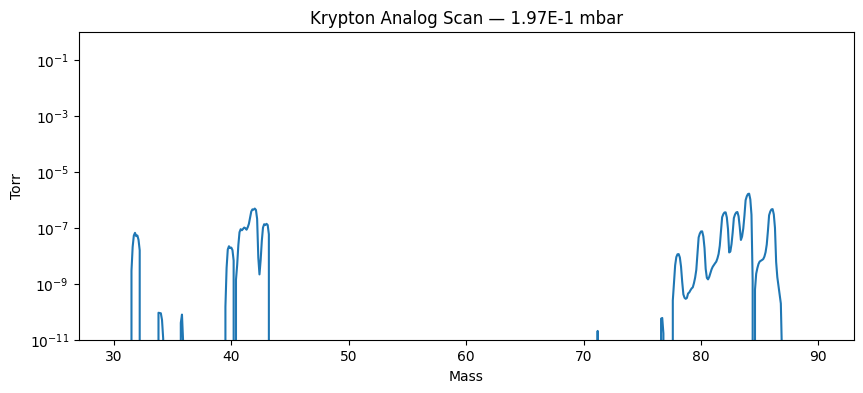

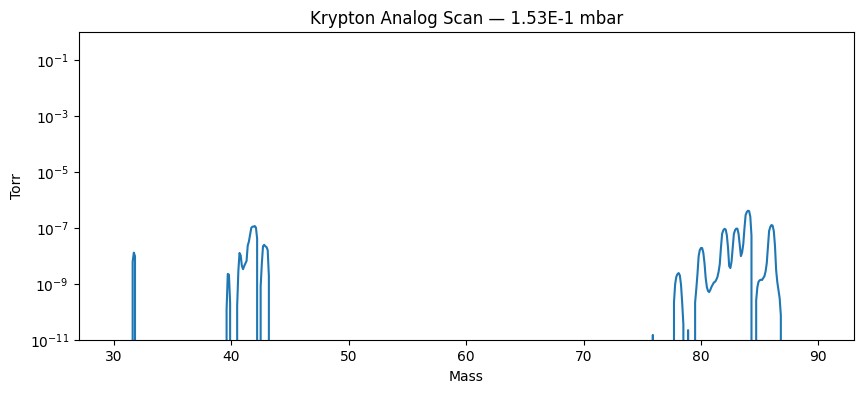

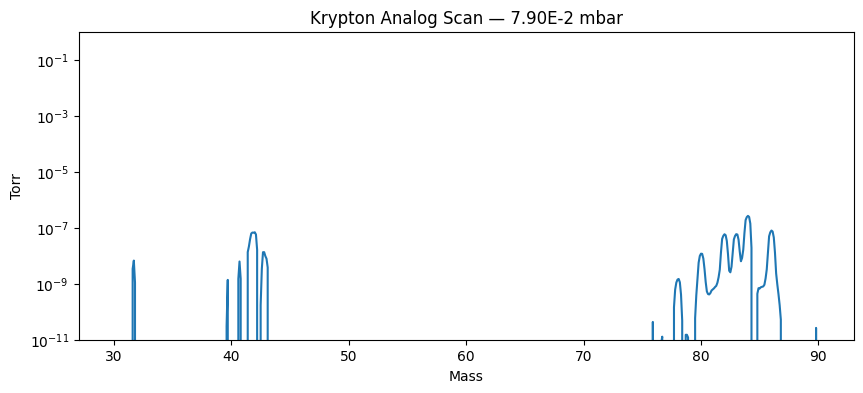

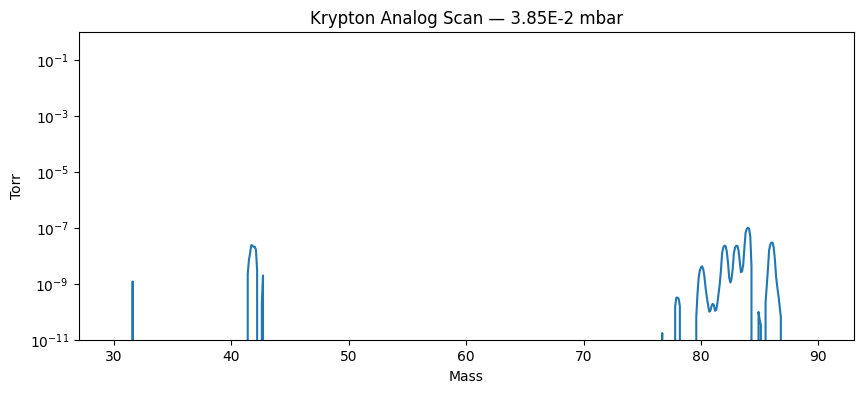

In [110]:
for idx, (key, data) in enumerate(data_dict.items()):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_ylim(bottom=1e-11)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])

    # --- insert the pressure in the title ---
    this_p = pressures[idx]            # take the matching pressure
    ax.set(
        xlabel='Mass',
        ylabel='Torr',
        title=f'Krypton Analog Scan — {this_p}'   # scientific format
    )

    plt.show()

In [102]:
for key, data in data_dict.items():
    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity


In [103]:
tableau10 = [
     "#3B71AA", "#F28E2B", "#020101", "#2EBBAF", "#2C8021",
    "#EDC948", "#FF1FBF", "#F3152B", "#CA6023", "#BAB0AC"
]

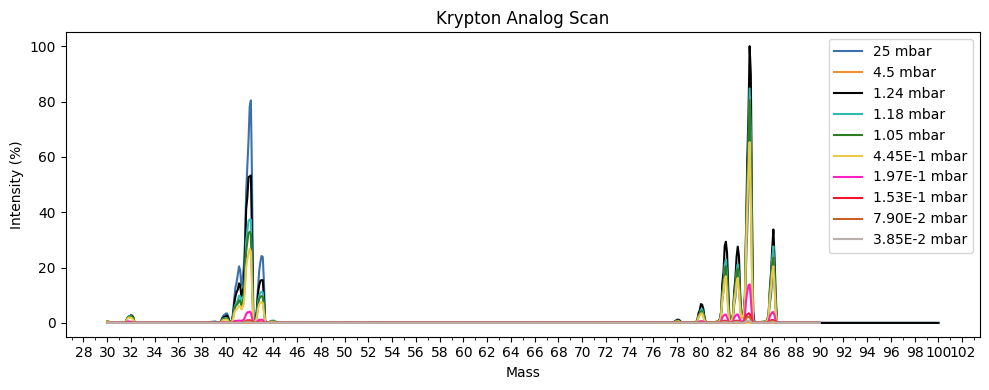

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_prop_cycle(cycler(color=tableau10))
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

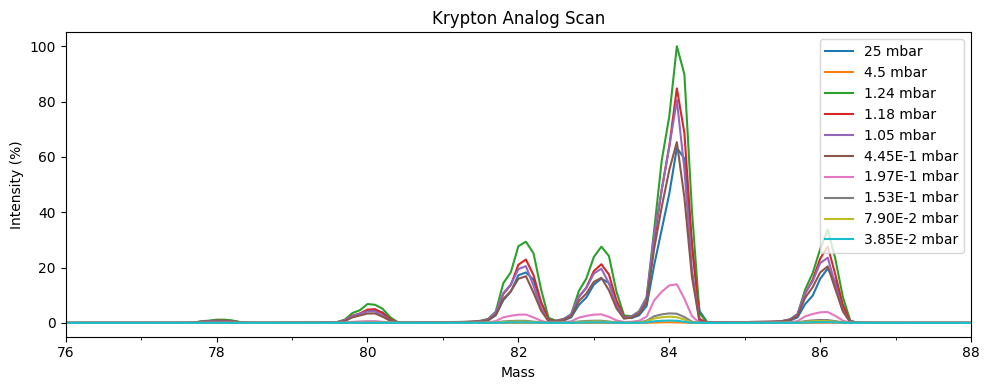

In [105]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(76, 88)
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

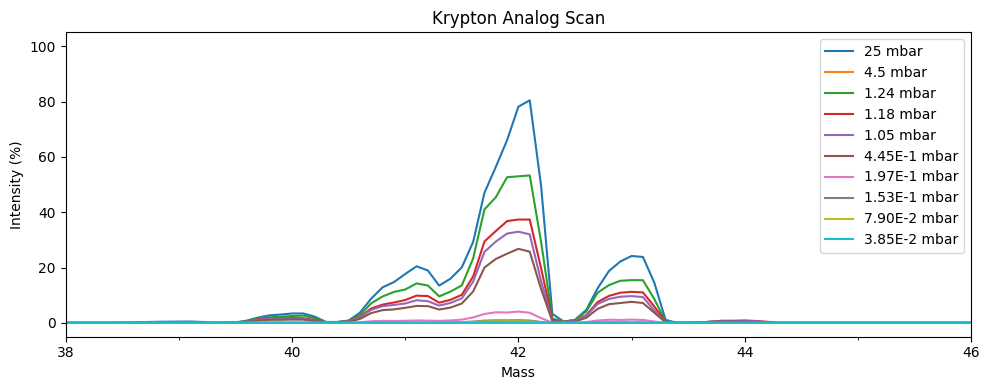

In [106]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(38, 46)
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()